### Text Mining Homework 5

Regarding first 2,000 overviews of movie review data (movies_metadata.csv), after undergoing the following preprocessing, you want to do cluster analysis for movie titles. Create a TF-IDF vector using the method below and answer the questions below

```
[Preprocessing]
[Step 1] Null Remove row with value
[Step 2] Convert non-alphabetic characters to spaces
[Step 3] Convert to lower case
[Step 4] Create TF-IDF considering stopwords
```

#### Problem 1

Please answer the questions below regarding the movie [Jumanji]

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

data = pd.read_csv('../Data/movies_metadata.csv', engine = 'python')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Check if there is null in building TF-IDF

In [56]:
data['tagline'].isnull().sum()

25054

Remove Null from overview

In [57]:
data['tagline'] = data['tagline'].fillna('')  # fillna(""): delete null
data['tagline'].isnull().sum() #  Null check again

0

In [58]:
data = data[:2000] # select 2000 review data

remove non-alphabetic characters and spaces

In [59]:
overview_list = []

for i in range(len(data['tagline'])):
    overview1 = re.sub('[^a-zA-z]',' ',data['tagline'][i])
    overview_list.append(overview1.lower())

In [60]:
titles = data['original_title']

In [62]:
import re
synopses = [re.sub(r'[^a-zA-Z]', ' ', overview) for overview in data['tagline']]
synopses = [line.lower() for line in synopses]

Vectorize using TF-IDF

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(synopses)

<Axes: >

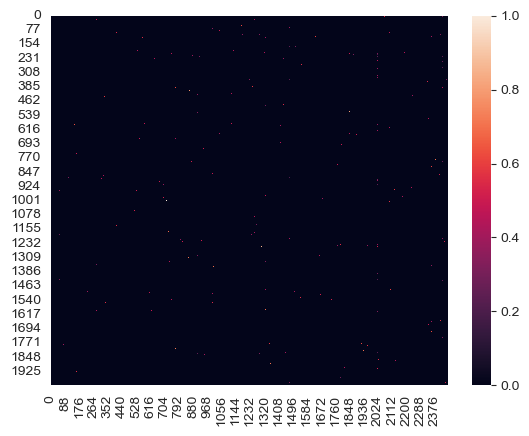

In [64]:
import seaborn as sns
sns.heatmap(
    tfidf_matrix.toarray()
)

make movie indeces

In [65]:
indices = pd.Series(data.index, index = data['title']).drop_duplicates()

**1.1**  Find how many movies are in the same cluster as the movie jumanji using Euclidean similarity and K-means (k=10) method.

In [66]:
from sklearn.cluster import KMeans

num_cluster = 10
kmeans_model = KMeans(
    n_clusters = num_cluster, 
    random_state = 42
)

%time kmeans_model.fit(tfidf_matrix)

CPU times: user 290 ms, sys: 219 ms, total: 508 ms
Wall time: 96.7 ms


/Users/junghunlee/anaconda3/envs/Webscraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

Kmeans clusters set a distance as euclidean to default. and now, we check a clustered labels.

In [67]:
clusters = kmeans_model.labels_.tolist()
clusters[:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [68]:
films = {'title': titles, 
         'synopsis': synopses, 
         'cluster': clusters}
frame = pd.DataFrame(films)
number_frame = pd.DataFrame(frame['cluster'].value_counts()).reset_index()
number_frame

,cluster,count
0,2,1910
1,7,40
2,5,14
3,6,12
4,3,10
5,4,6
6,8,5
7,0,1
8,9,1
9,1,1


In [69]:
print(f"The cluster number with jumanji is {frame[frame['title']=='Jumanji']['cluster'].to_list()[0]} and the number of movie in this cluster is {number_frame[number_frame['cluster'] == frame[frame['title']=='Jumanji']['cluster'].to_list()[0]]['count'].to_list()[0]}")

The cluster number with jumanji is 2 and the number of movie in this cluster is 1910


**1.2** Find how many movies are in the same cluster as the movie Jumanji using Euclidean similarity and hierarchical clustering (ward, k=10) method.

In [70]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(
    n_clusters = 10, # change number of clusters
    metric = 'euclidean',
    linkage = 'ward'
)
%time agg_cluster.fit(tfidf_matrix.toarray())

CPU times: user 1.52 s, sys: 22.3 ms, total: 1.54 s
Wall time: 1.57 s


AgglomerativeClustering(metric='euclidean', n_clusters=10)

In [71]:
result1 = agg_cluster.fit_predict(tfidf_matrix.toarray())

In [72]:
films = {'title': titles, 
         'synopsis': synopses, 
         'cluster': result1}
frame = pd.DataFrame(films)
frame['cluster'].value_counts(films)
number_frame = pd.DataFrame(frame['cluster'].value_counts()).reset_index()
number_frame

,cluster,count
0,2,1688
1,0,142
2,1,76
3,3,25
4,5,23
5,6,11
6,8,9
7,9,9
8,7,9
9,4,8


In [73]:
print(f"The cluster number with jumanji is {frame[frame['title']=='Jumanji']['cluster'].to_list()[0]} and the number of movie in this cluster is {number_frame[number_frame['cluster'] == frame[frame['title']=='Jumanji']['cluster'].to_list()[0]]['count'].to_list()[0]}")

The cluster number with jumanji is 2 and the number of movie in this cluster is 1688


In [74]:
frame

,title,synopsis,cluster
0,Toy Story,,2
1,Jumanji,roll the dice and unleash the excitement,2
2,Grumpier Old Men,still yelling still fighting still ready for...,0
3,Waiting to Exhale,friends are the people who let you be yourself...,0
4,Father of the Bride Part II,just when his world is back to normal he s ...,2
...,...,...,...
1995,Tex,,2
1996,Tron,a world inside the computer where man has neve...,2
1997,Swing Kids,in a world on the brink of war you either mar...,2
1998,Halloween: H20,blood is thicker than water,2


In [75]:
data['cluster'] = frame['cluster']

In [76]:
data[data['cluster'] == 1]['vote_average'].mean()

6.280263157894736

In [77]:
data[data['cluster'] == 3]['vote_average'].mean()

5.888000000000001

In [78]:
data[data['cluster'] == 0]['vote_average'].mean()

6.3500000000000005

In [79]:
data[data['cluster'] == 1]['vote_count'].mean()

455.38157894736844

**1.3** Recommend 3 movies that are closest to the movie Jumanji using cosine similarity 

In [80]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [81]:
def get_recommendations(
        title : str, 
        cosine_sim : np.array):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[0:10]  
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

print(
    get_recommendations('Jumanji', 
                        cosine_sim = cosine_sim)[1:4]
)

1404    Vegas Vacation
1183     The Quiet Man
983         Old Yeller
Name: title, dtype: object


#### Problem 2

We intend to analyze using a topic model based on LDA . Here, the max features of the TF -IDF vector are limited to 1000 and applied. Answer the questions below

In [82]:
import urllib.request
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

vectorizer = TfidfVectorizer(
    stop_words = 'english', 
    max_features = 1000
)
X = vectorizer.fit_transform(synopses)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**2.1** Apply the topic model of the Sklearn library to find where the first document falls under topics 0 to 9. Apply (designate 10 topics , random state = 777, learning method = online, max iter = 5)

In [83]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components = 10,
    learning_method = 'online',
    random_state = 777,
    max_iter = 5
)

%time lda_top = lda_model.fit_transform(X)

CPU times: user 294 ms, sys: 4.78 ms, total: 299 ms
Wall time: 300 ms


In [86]:
lda_top[1]

array([0.23920994, 0.25978865, 0.24464509, 0.03662233, 0.03662233,
       0.03662233, 0.03662233, 0.03662233, 0.03662233, 0.03662233])

The Topic of first document is index 9 and it's estimated value is about 0.6651

**2.2** Print the top 5 words for each of the 10 topics

In [87]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n = 5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), 
              [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('just', 18.06), ('don', 12.09), ('got', 8.81), ('war', 8.71), ('power', 8.26)]
Topic 2: [('time', 22.61), ('men', 11.08), ('new', 10.26), ('good', 9.53), ('adventure', 8.83)]
Topic 3: [('murder', 11.15), ('believe', 7.54), ('lives', 7.5), ('action', 4.43), ('half', 4.37)]
Topic 4: [('cop', 7.64), ('kill', 7.37), ('secret', 6.88), ('bad', 6.71), ('family', 6.64)]
Topic 5: [('comedy', 17.8), ('live', 6.8), ('high', 4.98), ('love', 4.69), ('new', 4.5)]
Topic 6: [('life', 11.7), ('romance', 8.35), ('night', 7.19), ('ready', 7.08), ('movie', 5.62)]
Topic 7: [('story', 18.87), ('man', 12.02), ('make', 8.69), ('love', 8.1), ('woman', 7.87)]
Topic 8: [('ll', 10.54), ('ve', 9.85), ('heart', 9.55), ('people', 8.87), ('best', 7.99)]
Topic 9: [('true', 11.05), ('picture', 9.52), ('terror', 8.55), ('come', 7.33), ('rules', 6.52)]
Topic 10: [('love', 18.01), ('way', 9.99), ('forever', 8.03), ('magic', 6.42), ('real', 6.11)]


**2.3** Use the show_perflexity function of the lecture notes to create a graph with the number of topic candidates from 2 to 30

In [88]:
def show_perplexity(vectorizer, 
                    start = 1, 
                    end = 30, 
                    max_iter = 5, 
                    topic_word_prior = 0.1,
                    doc_topic_prior = 1.0):
    iter_num = []
    per_value = []
    plt.figure(figsize = (6, 4))
    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(
            n_components = i, max_iter = max_iter,
            topic_word_prior = topic_word_prior,
            doc_topic_prior = doc_topic_prior,
            learning_method = 'batch',
            n_jobs = -1,
            random_state = 42)
        lda.fit(vectorizer)
        iter_num.append(i)
        pv = lda.perplexity(vectorizer)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.grid(False)
    plt.title('perplexity', fontsize = 12, fontfamily = 'Serif')
    plt.show()
    return start + per_value.index(min(per_value))

n_components: 1, perplexity: 1480.384
n_components: 2, perplexity: 2039.217
n_components: 3, perplexity: 2541.254
n_components: 4, perplexity: 3081.110
n_components: 5, perplexity: 3563.137
n_components: 6, perplexity: 4034.939
n_components: 7, perplexity: 4515.030
n_components: 8, perplexity: 4929.233
n_components: 9, perplexity: 5393.236
n_components: 10, perplexity: 5807.942
n_components: 11, perplexity: 6224.302
n_components: 12, perplexity: 6622.222
n_components: 13, perplexity: 6991.685
n_components: 14, perplexity: 7415.838
n_components: 15, perplexity: 7737.628
n_components: 16, perplexity: 8130.965
n_components: 17, perplexity: 8414.312
n_components: 18, perplexity: 8684.759
n_components: 19, perplexity: 9001.703
n_components: 20, perplexity: 9399.950
n_components: 21, perplexity: 9727.385
n_components: 22, perplexity: 10074.666
n_components: 23, perplexity: 10443.607
n_components: 24, perplexity: 10817.092
n_components: 25, perplexity: 11162.700
n_components: 26, perplexity: 

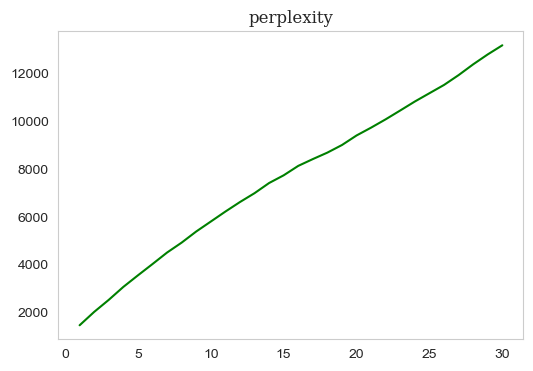

1

In [89]:
show_perplexity(X)